# Self Oil Station Prcie Analysis 

- 목적 : 셀프 주유소가 진짜 더 가격이 싼 지, 어느 구가 제일 비싼지 확인
- 데이터 : 한국석유공사 제공 데이터

## 1. 웹 스크래핑
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인 후 셀레니움으로 데이터 다운로드

---

## 2. 데이터 전처리

In [79]:
# 필요한 모듈 불러오기
# glob : 파일의 목록을 읽어오고 정리해주는 모듈
import pandas as pd 
from glob import glob 

In [83]:
# 셀레니움으로 다운받은 파일목록 한 번에 가져오기
# 와일드카드 * (all)
stations_raw_datas = glob("../data/지역_*.xls")
stations_raw_datas

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (25).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [84]:
type(stations_raw_data)

list

In [85]:
# 파일 합치기 : 1. 리스트로 만들기

stations_raw_total = [] 

for raw_data in stations_raw_datas:
    data = pd.read_excel(raw_data, header=2)
    stations_raw_total.append(data)

In [89]:
# 파일 합치기 : 2. pd.concat()로 합치기
# 리스트 재배열 : df.reset_index
stations_raw = pd.concat(stations_raw_total)
stations_raw.reset_index(drop=True, inplace=True)
stations_raw.head(5)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),GS칼텍스,02-902-9470,Y,-,1507,1297,-
1,서울특별시,태창에너지 좋은기름주유소,서울특별시 강북구 덕릉로 158 (번동),S-OIL,02-989-9806,N,-,1519,1319,-
2,서울특별시,(주)에프알엔디 직영 송정주유소,서울특별시 강북구 인수봉로 185 (수유동),SK에너지,02-993-5189,N,-,1519,1309,-
3,서울특별시,지에스이앤알 직영 미아주유소,서울특별시 강북구 도봉로 122 (미아동),GS칼텍스,02-987-5152,Y,1890,1519,1309,-
4,서울특별시,세종에너지 직영 세종주유소,서울특별시 강북구 삼양로 410 (수유동),S-OIL,02-907-5182,Y,-,1519,1309,1000


In [90]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      543 non-null    object
 1   상호      543 non-null    object
 2   주소      543 non-null    object
 3   상표      543 non-null    object
 4   전화번호    543 non-null    object
 5   셀프여부    543 non-null    object
 6   고급휘발유   543 non-null    object
 7   휘발유     543 non-null    object
 8   경유      543 non-null    object
 9   실내등유    543 non-null    object
dtypes: object(10)
memory usage: 42.5+ KB


In [91]:
# 컬럼명 확인하고 필요한 데이터만 확인
stations_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [92]:
# 필요한 데이터만 뽑아 새로운 데이터프레임 생성
stations = pd.DataFrame({
    "상호": stations_raw["상호"],
    "주소": stations_raw["주소"], 
    "가격": stations_raw["휘발유"],
    "셀프": stations_raw["셀프여부"],
    "상표": stations_raw["상표"]
})
stations.tail()

,상호,주소,가격,셀프,상표
538,명일주유소,서울 강동구 고덕로 168 (명일동),1679,N,SK에너지
539,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1689,N,GS칼텍스
540,CJ대한통운(주)직영 천호점주유소,서울 강동구 천중로 67 (천호동),1697,N,현대오일뱅크
541,강동주유소,서울 강동구 양재대로 1509 (길동),1988,N,SK에너지
542,명진석유(주)동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),-,Y,GS칼텍스


In [93]:
# 리스트 내포로 구컬럼을 생성한다
stations["구"] = [eachAddress.split()[1] for eachAddress in stations["주소"]]
stations.tail()

,상호,주소,가격,셀프,상표,구
538,명일주유소,서울 강동구 고덕로 168 (명일동),1679,N,SK에너지,강동구
539,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1689,N,GS칼텍스,강동구
540,CJ대한통운(주)직영 천호점주유소,서울 강동구 천중로 67 (천호동),1697,N,현대오일뱅크,강동구
541,강동주유소,서울 강동구 양재대로 1509 (길동),1988,N,SK에너지,강동구
542,명진석유(주)동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),-,Y,GS칼텍스,강동구


In [98]:
# 서울특별시, 특별시와 같은 데이터 오류 확인
stations["구"].unique(), len(stations["구"].unique())

(array(['강북구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '서울특별시', '성북구',
        '송파구', '양천구', '영등포구', '강서구', '용산구', '은평구', '종로구', '중구', '중랑구',
        '강남구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강동구'],
       dtype=object),
 27)

In [99]:
# 데이터 오류 수정
stations.loc[stations["구"] == "서울특별시", "구"] = "성동구"
stations.loc[stations["구"] == "특별시", "구"] = "도봉구"
stations["구"].unique(), len(stations["구"].unique())

(array(['강북구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강서구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강동구'], dtype=object),
 25)

In [100]:
# 가격 데이터형 변환 object => float (but. 오류발생)
stations["가격"] = stations["가격"].astype("float")

ValueError: could not convert string to float: '-'

In [101]:
# 마스킹을 사용하여 가격 정보가 있는 주유소만 사용 
stations = stations[stations["가격"] != "-"]
stations.tail()

,상호,주소,가격,셀프,상표,구
537,SK네트윅스(주)한미주유소,서울 강동구 성내로 32 (성내동),1678,N,SK에너지,강동구
538,명일주유소,서울 강동구 고덕로 168 (명일동),1679,N,SK에너지,강동구
539,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1689,N,GS칼텍스,강동구
540,CJ대한통운(주)직영 천호점주유소,서울 강동구 천중로 67 (천호동),1697,N,현대오일뱅크,강동구
541,강동주유소,서울 강동구 양재대로 1509 (길동),1988,N,SK에너지,강동구


In [102]:
# 다시 가격 컬럼의 데이터형을 변환
stations["가격"] = stations["가격"].astype("float")

In [104]:
# 정상적으로 변경됐음을 확인
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 0 to 541
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      536 non-null    object 
 1   주소      536 non-null    object 
 2   가격      536 non-null    float64
 3   셀프      536 non-null    object 
 4   상표      536 non-null    object 
 5   구       536 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.3+ KB


In [105]:
# 마스킹으로 뒤죽박죽된 인덱스를 재정렬 
stations.reset_index(drop=True, inplace=True)
stations.tail()

,상호,주소,가격,셀프,상표,구
531,SK네트윅스(주)한미주유소,서울 강동구 성내로 32 (성내동),1678.0,N,SK에너지,강동구
532,명일주유소,서울 강동구 고덕로 168 (명일동),1679.0,N,SK에너지,강동구
533,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1689.0,N,GS칼텍스,강동구
534,CJ대한통운(주)직영 천호점주유소,서울 강동구 천중로 67 (천호동),1697.0,N,현대오일뱅크,강동구
535,강동주유소,서울 강동구 양재대로 1509 (길동),1988.0,N,SK에너지,강동구


---

## 3. 데이터 시각화

In [111]:
# 필요한 모듈 불러오기
import matplotlib.pyplot as plt 
import seaborn as sns 
import platform
from matplotlib import font_manager, rc 

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC !!!")
    rc("font", family="AppleGothic")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows !!!")
    rc("font", family=font_name)
else:
    print("Unknown system... sorry~~~~")

plt.rcParams["axes.unicode_minus"] = False

Hangul OK in your Windows !!!


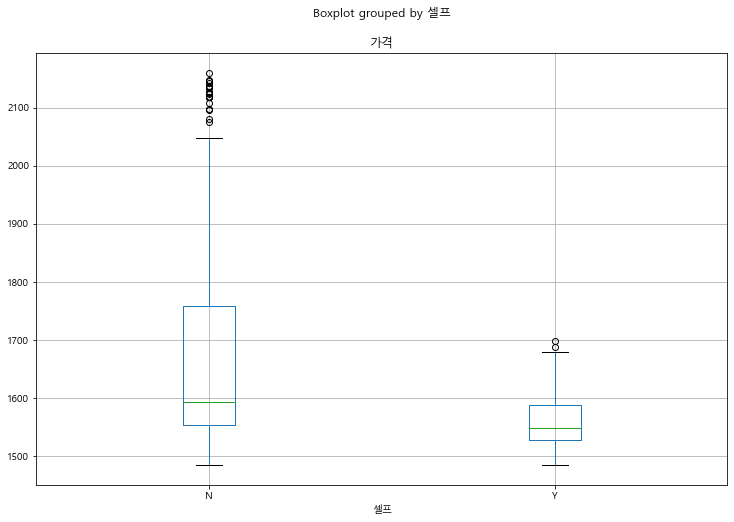

In [112]:
# matplotlib으로 boxplot을 그려본다
stations.boxplot(column="가격", by="셀프", figsize=(12, 8));

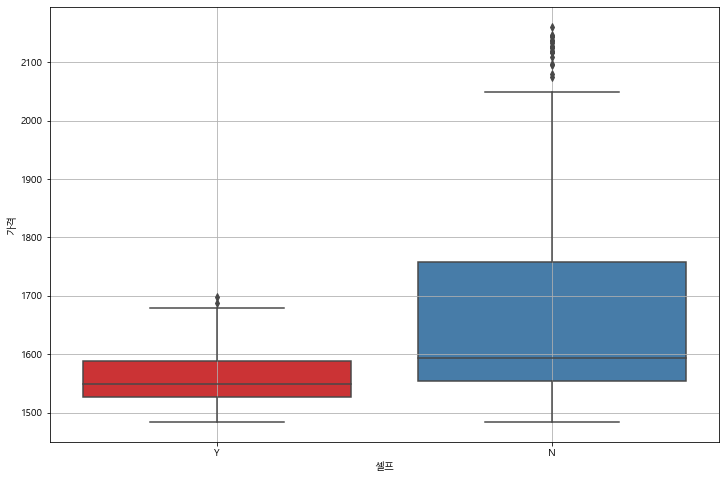

In [113]:
# seaborn으로 boxplot을 그려본다 ('셀프주유소인지 아닌지'를 기준으로)

plt.figure(figsize=(12, 8))
sns.boxplot(x="셀프", y="가격", data=stations, palette="Set1")
plt.grid(True)
plt.show()

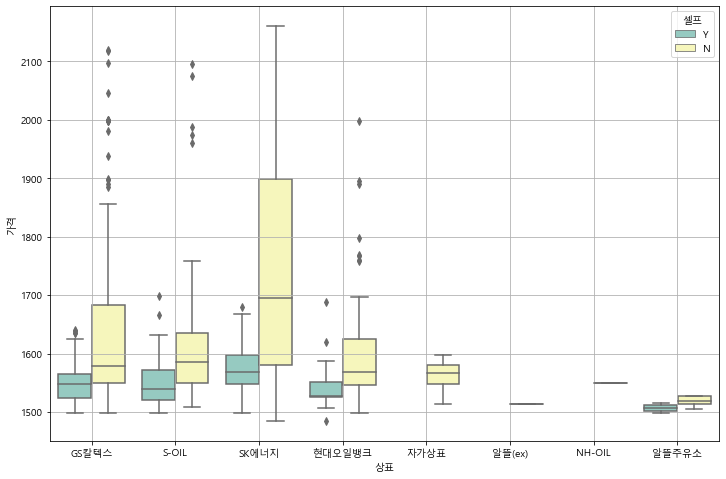

In [114]:
# seaborn으로 boxplot을 그려본다 ('상표'기준으로)
# hue로 카테고리 데이터를 표현

plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.grid(True)
plt.show()

In [ ]:
# 지도 시각화 

In [117]:
import json 
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [118]:
# 가장 비싼 주유소 10개 
stations.sort_values(by="가격", ascending=False).head()

,상호,주소,가격,셀프,상표,구
411,뉴서울(강남),서울 강남구 언주로 716 (논현동),2160.0,N,SK에너지,강남구
336,장충주유소,서울 중구 장충단로 202 (장충동1가),2147.0,N,SK에너지,중구
115,양재주유소,서울 서초구 바우뫼로 178 (양재동),2145.0,N,SK에너지,서초구
335,서남주유소,서울 중구 통일로 30 (봉래동1가),2143.0,N,SK에너지,중구
410,오천주유소,서울 강남구 봉은사로 503 (삼성동),2137.0,N,SK에너지,강남구


In [120]:
# 가장 값싼 주유소 10개 
stations.sort_values(by="가격", ascending=True).head(5)

,상호,주소,가격,셀프,상표,구
297,타이거주유소,서울 은평구 수색로 188 (증산동),1484.0,N,SK에너지,은평구
298,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1485.0,Y,현대오일뱅크,은평구
217,(주)MS주유소,서울특별시 영등포구 대림로 230 (대림동),1498.0,N,현대오일뱅크,영등포구
219,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1498.0,N,GS칼텍스,영등포구
216,성락주유소,서울 영등포구 가마산로 414 (신길동),1498.0,Y,S-OIL,영등포구


In [121]:
# 피봇테이블을 활용하여 구별 가격의 평균을 구한다

import numpy as np 

gu_data = pd.pivot_table(data=stations, index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1804.325581
강동구,1633.166667
강북구,1528.583333
강서구,1580.205882
관악구,1599.411765


In [123]:
# 구별 어느 지역이 평균 가격이 높은지 지도 시각화를 해서 확인

geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="Stamen Toner")
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd"
)
my_map